# Visualisation matricielle

Les graphiques matriciels vous permettent de tracer des données sous forme de matrices codées en couleur et peuvent également être utilisés pour indiquer des clusters dans les données

regardons le heatmap and clutermap:

In [3]:
import seaborn as sns
%matplotlib inline

In [4]:
flights = sns.load_dataset('flights')

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

Un heatmap est un type de graphique utilisé pour représenter les données sous forme de matrices codées en couleur. Il est souvent utilisé pour visualiser la corrélation entre plusieurs variables quantitatives. Les valeurs sont codées en couleur selon une palette de couleurs, où des couleurs plus claires représentent des valeurs plus élevées et des couleurs plus sombres représentent des valeurs plus faibles.

Dans Seaborn, la fonction heatmap est utilisée pour créer un heatmap. Les paramètres couramment utilisés incluent :

data : Le tableau de données à utiliser pour le tracé.

annot : Permet de spécifier si les valeurs numériques doivent être affichées à l'intérieur des cellules du heatmap.

cmap : La palette de couleurs à utiliser pour coder les valeurs.

linewidths : La largeur des lignes séparant les cellules du heatmap.

cbar : Permet de spécifier si une barre de couleur doit être ajoutée au graphique pour indiquer les valeurs codées en couleur.

Par exemple:

In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


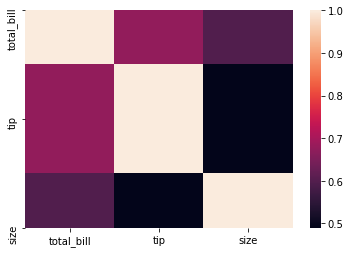

In [10]:
sns.heatmap(tips.corr())

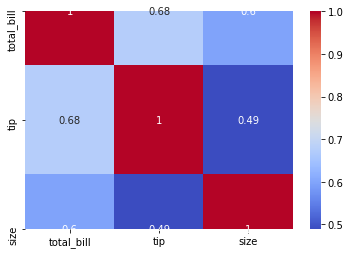

In [11]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Ou pour les données de vols :

In [12]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


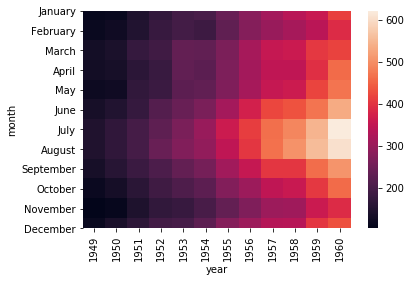

In [13]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

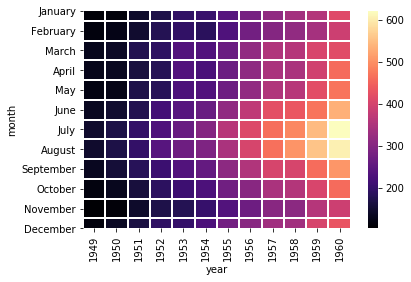

In [14]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## Clustermap

Un clustermap est un type de diagramme de chaleur utilisé pour représenter les relations de distance entre les éléments d'un ensemble de données. Les données sont divisées en groupes (ou clusters) en fonction de leur similitude en utilisant une méthode de classification hiérarchique. Les éléments similaires sont alors regroupés et colorés de manière similaire sur la carte. Les axes du clustermap représentent généralement les différentes variables ou caractéristiques des données, tandis que la chaleur de la couleur représente la proximité des éléments. Le clustermap peut être utilisé pour explorer et visualiser la structure des données en explorant les relations entre les variables et les groupes d'éléments.

Voici les paramètres les plus couramment utilisés pour créer un clustermap:

data : la matrice de données que vous souhaitez utiliser pour créer le clustermap.

method : la méthode utilisée pour la classification hiérarchique. Les valeurs possibles incluent "single", "complete", "average", "ward".

metric : la métrique utilisée pour la distance. Les valeurs possibles incluent "euclidean", "manhattan", "mahalanobis".

cmap : la palette de couleurs utilisée pour représenter la distance. Les valeurs possibles incluent "Reds", "Blues", "Greens", "BuGn".

annot : si les valeurs des cellules doivent être annotées sur le clustermap. Les valeurs possibles sont "True" et "False".

linewidths : la largeur des lignes entourant les cellules.

figsize : la taille de la figure en pouces.

cbar_kws : des paramètres supplémentaires pour la barre de couleur, tels que la largeur et la hauteur.

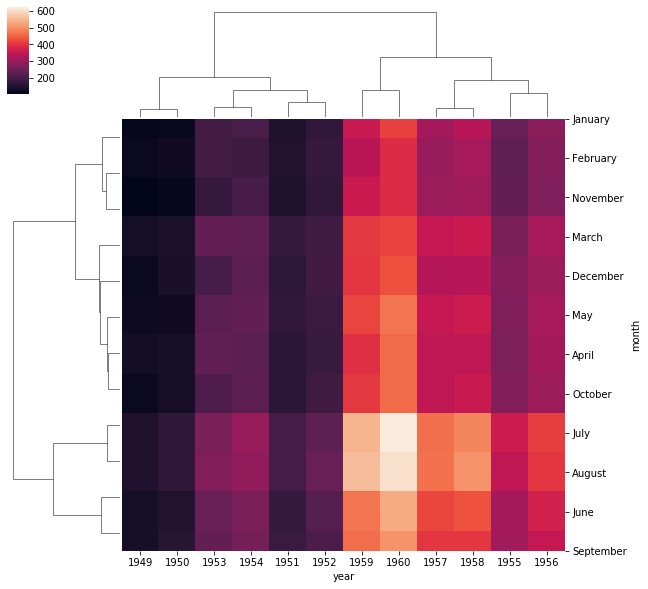

In [15]:
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

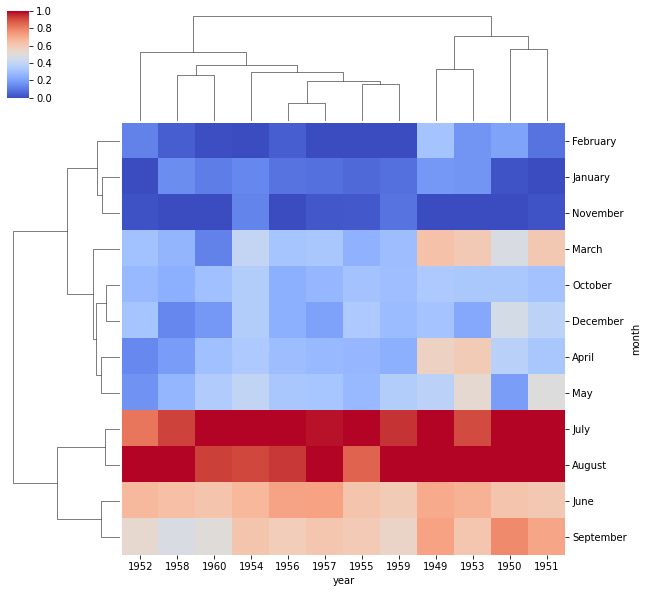

In [16]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)